# __4. Credit Risk Modelling:__ Prediction
## by: __Aprian Immanuel__ (087785160835 / immanuelaprian@gmail.com)

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve, recall_score, precision_score, confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('precredit_test.csv')
df.columns

Index(['NULL', 'LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN',
       'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'INCOME_TYPE',
       'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE', 'DAYS_WORK',
       'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY',
       'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3'],
      dtype='object')

## __1. Value Encoding:__ This step is for preparing the dataset to be ready feature selected and modelled
### a. INCOME TYPE

In [3]:
df_new = df.copy()
df_new = df_new.dropna(axis=0)
incometype_dict = {'Working': 1, 'Commercial associate': 2, 'Pensioner': 3, 'State servant': 4, 'Unemployed':5}
df_new['income_type_ord'] = df['INCOME_TYPE'].map(incometype_dict)
df_new[['income_type_ord', 'INCOME_TYPE']].head(3)

,income_type_ord,INCOME_TYPE
2,1,Working
3,1,Working
6,1,Working


### b. EDUCATION BACKGROUND

In [4]:
education_dict = {'Secondary / secondary special': 1, 'Higher education': 2, 'Incomplete higher': 3, 'Lower secondary': 4, 'Academic degree': 5}
df_new['education_ord'] = df['EDUCATION'].map(education_dict)
df_new[['education_ord', 'EDUCATION']].head(3)

,education_ord,EDUCATION
2,1,Secondary / secondary special
3,1,Secondary / secondary special
6,1,Secondary / secondary special


## 2. Handling Imbalanced Target - SMOTE Oversampling

In [5]:
x = df_new[['income_type_ord', 'education_ord', 'DAYS_AGE', 'DAYS_WORK', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3']]
y = df_new['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
sm = SMOTE(random_state = 0)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

## 3. Prediction and Evaluation Metrix

In [8]:
#import library sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [9]:
model_DTC_RS = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=1, max_depth=20, criterion='entropy', splitter='best')
model_DTC_RS.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)

In [10]:
# membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
y_pred_DTC_new = model_DTC_RS.predict(x_test)
# jika ingin tahu probability dalam membuat tebakan
y_pred_proba_DTC = model_DTC_RS.predict_proba(x_test)

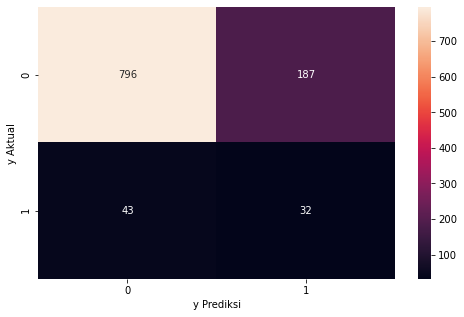

In [11]:
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_DTC_new), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [12]:
# confusion matrix report
print(classification_report(y_test, y_pred_DTC_new))

precision    recall  f1-score   support

           0       0.95      0.81      0.87       983
           1       0.15      0.43      0.22        75

    accuracy                           0.78      1058
   macro avg       0.55      0.62      0.55      1058
weighted avg       0.89      0.78      0.83      1058



In [13]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_DTC_new)*100, recall_score(y_test, y_pred_DTC_new)*100,
                     precision_score(y_test, y_pred_DTC_new)*100, roc_auc_score(y_test, y_pred_DTC_new)*100,
                    f1_score(y_test, y_pred_DTC_new)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,78.260870
recall,42.666667
precision,14.611872
roc_auc_score,61.821634
f1 score,21.768707


In [14]:
pd.DataFrame(data=[model_DTC_RS.score(x_train_sm, y_train_sm)*100,
                  model_DTC_RS.score(x_test,y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,97.62268
Model Score in Data Test,78.26087


## From the Evaluation Metrics, we understand that
### a. Decision Tree Classifier with Oversampling Technique Algorithm (SMOTE), that has been tuned, has better result for this dataset than Logistic Regression and Random Forrest in both after tuned or before tuned. 
### b. However, this model __has not been recommended__ for entering production stage. This is because the model still has low f1 score. We understand that we need better f1 score value for entering production stage. Still, it is recommended for doing Grid Search Cross Value since we only did Randomized Search Cross Value due to efficiency reason. 

<hr>